### FIGURE 3B-c
© 2021. This work is licensed under a CC-BY-NC-SA license. 
"Thalamo-cortical spiking model of incremental learning combining perception, context and NREM-sleep-mediated noise-resilience"
Authors: Bruno Golosio, Chiara De Luca, Cristiano Capone, Elena Pastorelli, Giovanni Stegel, Gianmarco Tiddia, Giulia De Bonis and Pier Stanislao Paolucci
arxiv.2003.11859


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio

%matplotlib inline

In [125]:
home = os.getcwd()
#loading_path = home + '/../SimulationOutput/Thaco_SleepActivity/temp10.0/'
loading_path = home + '/Data/sub10/'
#loading_path = home + '/../SimulationOutput/Thaco_SleepActivity2/sub10/'

evt_cx_test = sio.loadmat(loading_path + 'events.mat')['evt_exc'][0]/1000.
evt_th_test = sio.loadmat(loading_path + 'events.mat')['evt_th'][0]/1000.


StartTrain_1 = 0.
EndTrain_1 = 3*10. - 1.5
StartTest1_Pre = EndTrain_1+15. + 1.5
EndTest1_Pre = StartTest1_Pre + 2.5*20 -1.5
StartSleep_1 = EndTest1_Pre + 15. +1.5
EndSleep_1 = StartSleep_1 +200.
StartTest1_Post = EndSleep_1 + 15
EndTest1_Post = StartTest1_Post + 2.5*20

StartTrain_2 = EndTest1_Post + 15.
StartSleep_2 = 500.
EndSleep_2 = 700.

In [126]:
N_Th = len(evt_th_test)
N_Cx = 200 #len(evt_cx_test)

x_th = []
y_th = []

for neur in range(0, N_Th):
    try:
        x_th.extend(evt_th_test[neur][0])
        y_th.extend(np.ones([len(evt_th_test[neur][0])])*neur)
    except IndexError:
        a = 1

x = []
y = []
for neur in range(0, N_Cx):
    try:
        x.extend(evt_cx_test[neur][0])
        y.extend(np.ones([len(evt_cx_test[neur][0])])*neur)
    except IndexError:
        a = 1


Text(0, 0.5, '# th neuron')

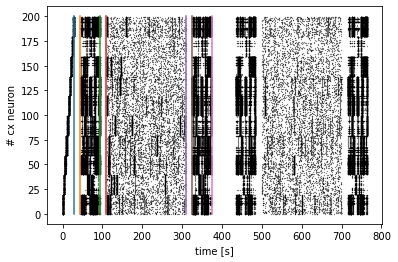

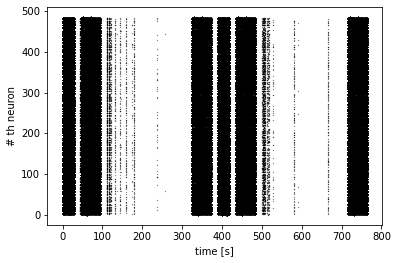

In [127]:

plt.figure()
plt.plot(x, y, '.', color = [0., 0., 0.], markersize=0.4)
plt.xlabel('time [s]')
plt.ylabel('# cx neuron')
#plt.xlim(60., 110)
#plt.ylim([140,200])
plt.plot([EndTrain_1 ,EndTrain_1], [0, 200])
plt.plot([StartTest1_Pre,StartTest1_Pre], [0, 200])
plt.plot([EndTest1_Pre, EndTest1_Pre], [0, 200])
plt.plot([StartSleep_1, StartSleep_1], [0,200])
plt.plot([EndSleep_1, EndSleep_1], [0,200])
plt.plot([StartTest1_Post, StartTest1_Post], [0,200])
plt.plot([EndTest1_Post, EndTest1_Post], [0,200])

plt.figure()
plt.plot(x_th, y_th, '.', color = [0., 0., 0.], markersize=0.4)
plt.xlabel('time [s]')
plt.ylabel('# th neuron')
#plt.xlim(0., 300.)
#plt.ylim([140,200])


In [128]:
# compute fr
# Th-Current, Cx-firing rate computation
start = 0
dt = 0.2
x_fr = np.linspace(0, np.int(np.max(x)), np.int(np.max(x)/dt))
Fr_cx = []
Fr_th = []


for time in range(0, np.int(np.max(x)/dt)): # per ogni tempo
    fr_temp = []
    for neur_cx in range(0, N_Cx): # per ogni neurone corticale
        # calcolo il f.r. del neurone corticale
        temp1 = evt_cx_test[neur_cx] >= start + time*dt
        temp2 = evt_cx_test[neur_cx] < start + (time+1)*dt
        idx = np.where(temp1 & temp2)[0]
        fr_temp.append(np.float64(len(evt_cx_test[neur_cx][idx]))/dt)    
    Fr_cx.append(np.mean(fr_temp))
    
    fr_temp = []
    for neur_th in range(0, N_Th): # per ogni neurone corticale
        # calcolo il f.r. del neurone corticale
        temp1 = evt_th_test[neur_th] >= start + time*dt
        temp2 = evt_th_test[neur_th] < start + (time+1)*dt
        idx = np.where(temp1 & temp2)[0]
        fr_temp.append(np.float64(len(evt_th_test[neur_th][idx]))/dt)    
    Fr_th.append(np.mean(fr_temp))
    
    
Fr_cx = np.array(Fr_cx)
Fr_th = np.array(Fr_th)

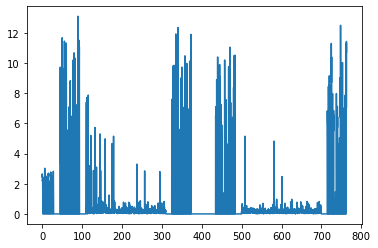

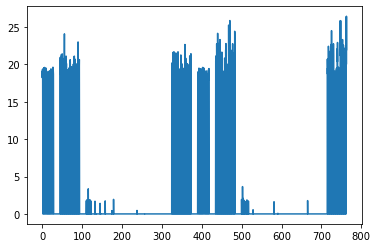

In [66]:
plt.figure()
plt.plot(x_fr, Fr_cx)
#plt.xlim([0, 400])

plt.figure()
plt.plot(x_fr, Fr_th)
#plt.xlim([0, 400])

(0.0, 593.5)

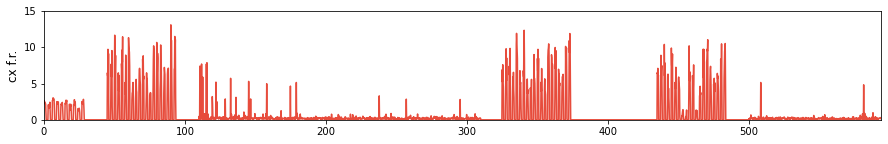

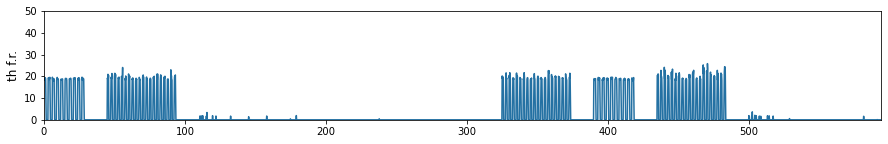

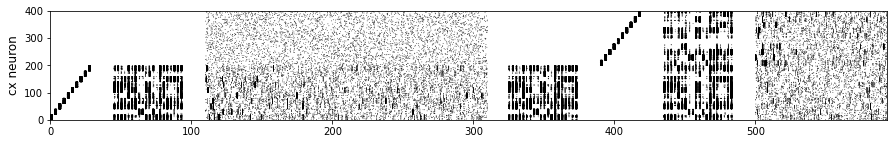

In [261]:
plt.figure(figsize=(15,2))
plt.plot(x_fr, Fr_cx, color = [231./255., 76./255., 60./255.])
plt.ylabel('cx f.r.', fontsize = 12.)
plt.xlim([0, EndTest1_Post])
plt.ylim([0, 15])
#plt.savefig('../Results/ActivityNetwork/' + 'FrCortex_1es.eps', format = 'eps')
#plt.savefig('../Results/ActivityNetwork/' + 'FrCortex_1es.png', format = 'png')

plt.figure(figsize=(15,2))
plt.plot(x_fr, Fr_th, color = [36./255., 113./255., 163./255.])
plt.ylabel('th f.r.', fontsize = 12.)
plt.xlim([0, EndTest1_Post])
plt.ylim([0, 50])
#plt.savefig('../Results/ActivityNetwork/' + 'FrThalamus_1es.eps', format = 'eps')
#plt.savefig('../Results/ActivityNetwork/' + 'FrThalamus_1es.png', format = 'png')


plt.figure(figsize=(15,2))
#plt.plot(x, y, '.', marker = 'o', markersize = 0.2, color = 'black')
plt.scatter(x, y, s=0.6, edgecolors='none', facecolors='black', marker = 'o')

plt.ylabel('cx neuron', fontsize = 12.)
plt.ylim([0, 400])
plt.xlim([0, EndTest1_Post])
#plt.savefig('../Results/ActivityNetwork/' + 'RasterCortex_1es.eps', format = 'eps')
#plt.savefig('../Results/ActivityNetwork/' + 'RasterCortex_1es.png', format = 'png', dpi = 300)


Text(0, 0.5, 'cx f.r.')

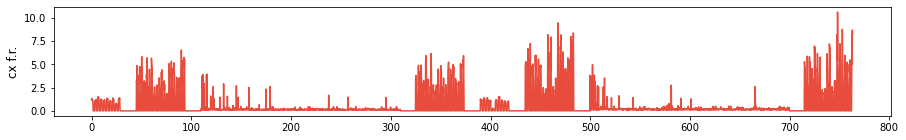

In [274]:
plt.figure(figsize=(15,2))
plt.plot(x_fr2, Fr_cx2, color = [231./255., 76./255., 60./255.])
plt.ylabel('cx f.r.', fontsize = 12.)

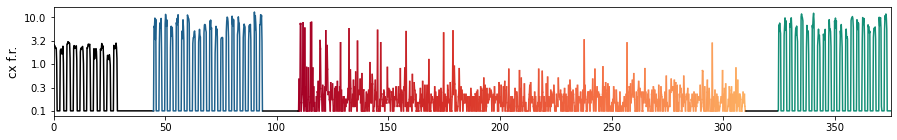

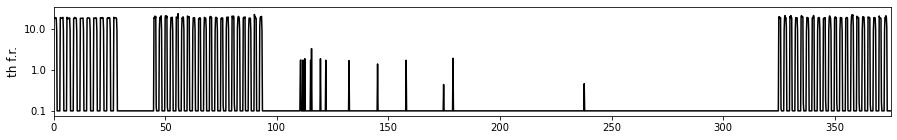

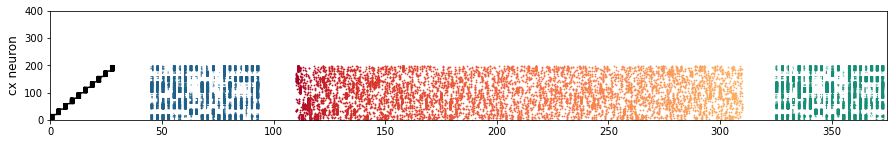

In [235]:
from matplotlib import cm

#import matplotlib.colors

plt.figure(figsize=(15,2))

logFr = Fr_cx.copy()
logFr[np.where(logFr < 0.1)[0]] = 0.1
logFr = np.log10(logFr)

temp1 = x_fr >= StartSleep_1-0.5
temp2 = x_fr < EndSleep_1 + 0.2
idx_sleep = np.where(temp1 & temp2)[0]
#plt.figure()
import seaborn as sns
with sns.color_palette("RdYlGn", n_colors=np.int32(len(idx_sleep)*3.3)):
    for i in range(len(idx_sleep)-1):
        
        plt.plot([x_fr[idx_sleep[i]],x_fr[idx_sleep[i+1]]],[logFr[idx_sleep[i]],logFr[idx_sleep[i+1]]])

#train black
idx_train = np.where(x_fr < StartTest1_Pre-0.1)[0]
plt.plot(x_fr[idx_train], logFr[idx_train], color = 'black')
#test pre 
temp1 = x_fr >= StartTest1_Pre-0.5
temp2 = x_fr < EndTest1_Pre + 0.2
idx_test = np.where(temp1 & temp2)[0]
plt.plot(x_fr[idx_test], logFr[idx_test], color = [31./255., 97./255., 141./255.])
#test post
temp1 = x_fr >= StartTest1_Post-0.5
temp2 = x_fr < EndTest1_Post + 0.2
idx_test_post = np.where(temp1 & temp2)[0]
plt.plot(x_fr[idx_test_post], logFr[idx_test_post], color = [20./255., 143./255., 119./255.])
# tra test e sleep
temp1 = x_fr >= EndTest1_Pre + 0.2
temp2 = x_fr < StartSleep_1-0.5
idx_test_intra_pre = np.where(temp1 & temp2)[0]
plt.plot(x_fr[idx_test_intra_pre], logFr[idx_test_intra_pre], color = 'black')
# tra sleep e sleep
temp1 = x_fr >=  EndSleep_1 + 0.2
temp2 = x_fr < StartTest1_Post-0.5
idx_test_intra_post = np.where(temp1 & temp2)[0]
plt.plot(x_fr[idx_test_intra_post], logFr[idx_test_intra_post], color = 'black')


#plt.xlim([100, 125.])
plt.ylabel('cx f.r.', fontsize = 12.)
plt.yticks([-1.0, -0.5, 0., 0.5, 1.0], (np.round(10**(-1.),1), np.round(10**(-.5),1), np.round(10**(0.),1), np.round(10**(0.5),1), np.round(10**(1.),1)))
plt.xlim([0, EndTest1_Post])
#plt.ylim([0, 15])
#plt.savefig('../Results/ActivityNetwork/' + 'LogFrCortex_1es.eps', format = 'eps')
#plt.savefig('../Results/ActivityNetwork/' + 'LogFrCortex_1es.png', format = 'png')



logFrTh = Fr_th.copy()
logFrTh[np.where(logFrTh < 0.1)[0]] = 0.1
logFrTh = np.log10(logFrTh)


plt.figure(figsize=(15,2))

plt.plot(x_fr, logFrTh, color = 'black')
plt.ylabel('th f.r.', fontsize = 12.)
plt.xlim([0, EndTest1_Post])
plt.yticks([-1.0, 0., 1.0], (np.round(10**(-1.),1), np.round(10**(0.),1),  np.round(10**(1.),1)))

#plt.ylim([0, 50])
#plt.savefig('../Results/ActivityNetwork/' + 'LogFrThalamus_1es.eps', format = 'eps')
#plt.savefig('../Results/ActivityNetwork/' + 'LogFrThalamus_1es.png', format = 'png')


plt.figure(figsize=(15,2))

x_plt = np.array(x.copy())
y_plt = np.array(y.copy())


temp1 = x_plt >= StartSleep_1-0.5
temp2 = x_plt < EndSleep_1 + 0.2
idx_sleep = np.where(temp1 & temp2)[0]
#plt.figure()

x_plot_temp = x_plt[idx_sleep]
y_plot_temp = y_plt[idx_sleep]

idx_sort = np.argsort(x_plot_temp)
x_plot_temp = x_plot_temp[idx_sort]
y_plot_temp = y_plot_temp[idx_sort]

import seaborn as sns
with sns.color_palette("RdYlGn", n_colors=np.int32(len(idx_sleep)*3.3)):
    for i in range(len(idx_sleep)-1):

        #plt.plot([x_plt[idx_sleep[i]],x_plt[idx_sleep[i+1]]],[logFr[idx_sleep[i]],logFr[idx_sleep[i+1]]])
        plt.scatter(x_plot_temp[i], y_plot_temp[i], s=0.6, marker = 'o')

        
#train black
idx_train = np.where(x_plt < StartTest1_Pre-0.1)[0]
plt.plot(x_plt[idx_train], y_plt[idx_train], color = 'black')
plt.scatter(x_plt[idx_train], y_plt[idx_train], s=0.6, edgecolors='none', facecolors='black', marker = 'o')

#test pre 
temp1 = x_plt >= StartTest1_Pre-0.5
temp2 = x_plt < EndTest1_Pre + 0.2
idx_test = np.where(temp1 & temp2)[0]
plt.scatter(x_plt[idx_test], y_plt[idx_test], s=0.6, edgecolors='none', facecolors=[31./255., 97./255., 141./255.], marker = 'o')

#test post
temp1 = x_plt >= StartTest1_Post-0.5
temp2 = x_plt < EndTest1_Post + 0.2
idx_test_post = np.where(temp1 & temp2)[0]
plt.scatter(x_plt[idx_test_post], y_plt[idx_test_post], s=0.6, edgecolors='none', facecolors=[20./255., 143./255., 119./255.], marker = 'o')

plt.ylabel('cx neuron', fontsize = 12.)
plt.ylim([0, 400])
plt.xlim([0, EndTest1_Post])
#plt.savefig('../Results/ActivityNetwork/' + 'LogRasterCortex_1es.eps', format = 'eps')
#plt.savefig('../Results/ActivityNetwork/' + 'LogRasterCortex_1es.png', format = 'png', dpi = 300)


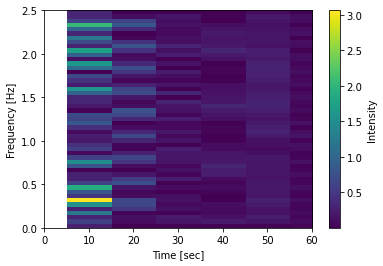

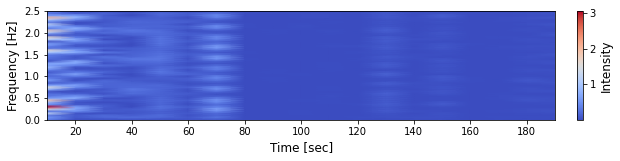

In [275]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

#x_time = np.array(range(0, np.int32(total_time), np.int32(dt)))/1000.
temp1 = x_fr > StartSleep_1
temp2 = x_fr < EndSleep_1
idx = np.where(temp1 & temp2)[0]
Fr = Fr_cx[idx]

fs = 1./dt

fig = plt.figure()
#f, t, Sxx = signal.spectrogram(np.log(lfp2*(1000./180)), fs)
#plt.pcolormesh(t, fftshift(f), 10*fftshift(Sxx, axes=0))
Pxx, freqs, bins, im = plt.specgram(Fr,  Fs=fs, NFFT=100, detrend='mean', scale='linear', noverlap= 50)
#plt.ylim([0.01, 10])
plt.xlim([0, 60])
#plt.yscale('log')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = fig.colorbar(im).set_label('Intensity')

from scipy.interpolate import interp2d

plt.figure(figsize=(10,2))
#plt.imshow(Pxx, aspect=4, interpolation='gaussian')
plt.pcolormesh(bins, freqs, Pxx, cmap='coolwarm', shading='gouraud')
#plt.yscale('log')
#plt.ylim([0.01, 10])
#plt.xlim([10, 30])

cbar= plt.colorbar(fraction=0.05, pad=0.04)
plt.ylabel('Frequency [Hz]', fontsize = 12.)
plt.xlabel('Time [sec]', fontsize = 12.)
cbar.set_label('Intensity', fontsize = 12.)
plt.savefig('../Results/ActivityNetwork/' + 'Spettrogramma_1es.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'Spettrogramma_1es.png', format = 'png', dpi = 300)



In [276]:
#SO RATIO
# compute fr
# Th-Current, Cx-firing rate computation
start = StartSleep_1
dt = 5
x_fr_SO = np.linspace(StartSleep_1, EndSleep_1, np.int((EndSleep_1-StartSleep_1)/dt))
Fr_cx_SO = np.zeros([20, np.int((EndSleep_1-StartSleep_1)/dt)])



for time in range(0, np.int((EndSleep_1-StartSleep_1)/dt)): # per ogni tempo
    fr_temp = []
    for neur_cx in range(0, N_Cx): # per ogni neurone corticale
        # calcolo il f.r. del neurone corticale
        temp1 = evt_cx_test[neur_cx] >= start + time*dt
        temp2 = evt_cx_test[neur_cx] < start + (time+1)*dt
        idx = np.where(temp1 & temp2)[0]
        fr_temp.append(np.float64(len(evt_cx_test[neur_cx][idx]))/dt)    
    for gr in range(0, 20):
        Fr_cx_SO[gr, time] = np.mean(fr_temp[gr*20:(gr+1)*20])
    
Fr_cx_SO = np.array(Fr_cx_SO)


In [80]:
threshold = 0.5
SO_gr = np.zeros([20, np.int((EndSleep_1-StartSleep_1)/dt)])
for gr in range(0, 20):
    SO_gr[gr] = Fr_cx_SO[gr] > threshold
SO = np.float64(np.sum(SO_gr, axis =0))


310.0
[5. 3. 2. 1. 1. 1. 0. 2. 0. 1. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]


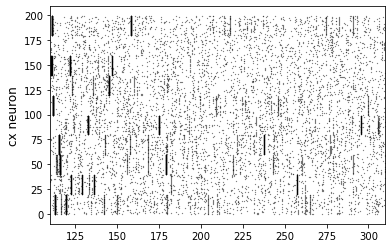

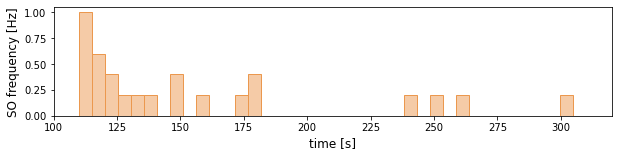

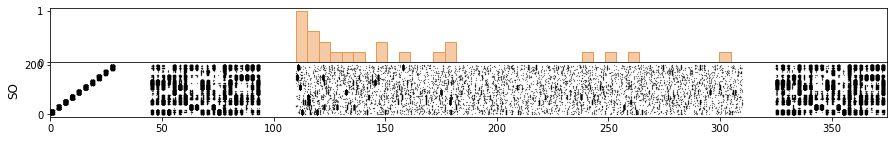

In [81]:
plt.figure()
plt.plot(x, y, 'o', markersize = 0.2, color = 'black', mfc='black', mec='black', mfcalt='black')
plt.ylabel('cx neuron', fontsize = 12.)
plt.xlim([StartSleep_1, EndSleep_1])
print(EndSleep_1)
plt.figure(figsize=(10,2))
idx = np.where(x_fr_SO < EndSleep_1)[0]
plt.bar(x_fr_SO[idx] + (x_fr_SO[1]-x_fr_SO[0])/2., SO[idx]/dt, width = (x_fr_SO[1]-x_fr_SO[0]), edgecolor = [235./255., 152./255., 78./255.], color = [245./255., 203./255., 167./255.])
plt.ylabel('SO frequency [Hz]', fontsize = 12.)
plt.xlabel('time [s]', fontsize = 12.)


plt.savefig('../Results/ActivityNetwork/' + 'SO_1es.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'SO_1es.png', format = 'png', dpi=300)

fig = plt.figure(figsize=(15,2))
gs = fig.add_gridspec(2, 1, hspace=0, wspace=0)
(ax2, ax1) = gs.subplots(sharex='col', sharey='row')
ax1.plot(x, y, 'o', markersize = 0.2, color = 'black', mfc='black', mec='black', mfcalt='black')
plt.ylabel('cx neuron', fontsize = 12.)
plt.xlim([0, EndTest1_Post])
#print(EndTest1_Post)
idx = np.where(x_fr_SO < EndSleep_1)[0]
print(SO)
ax2.bar(x_fr_SO[idx] + (x_fr_SO[1]-x_fr_SO[0])/2., SO[idx]/dt, width = (x_fr_SO[1]-x_fr_SO[0]), edgecolor = [235./255., 152./255., 78./255.], color = [245./255., 203./255., 167./255.])
plt.ylabel('SO', fontsize = 12.)
#ax1.set_xlim([0, EndSleep_1])

#plt.xlabel('time [s]', fontsize = 12.)
plt.savefig('../Results/ActivityNetwork/' + 'SO_1es_ver1.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'SO_1es_ver1.png', format = 'png', dpi=300)

In [248]:
home = os.getcwd()
#loading_path = home + '/../SimulationOutput/Thaco_SleepActivity/temp10.0/'
loading_path = home + '/../SimulationOutput/Thaco_SleepActivity/sub10/'
#loading_path = home + '/../SimulationOutput/Thaco_SleepActivity2/sub10/'

evt_cx_test = sio.loadmat(loading_path + 'events.mat')['evt_exc'][0]/1000.
evt_th_test = sio.loadmat(loading_path + 'events.mat')['evt_th'][0]/1000.


StartTrain_1 = 0.
EndTrain_1 = 3*10. - 1.5
StartTest1_Pre = EndTrain_1+15. + 1.5
EndTest1_Pre = StartTest1_Pre + 2.5*20 -1.5
StartSleep_1 = EndTest1_Pre + 15. +1.5
EndSleep_1 = StartSleep_1 +200.

StartSleep1_Post = EndSleep_1 + 100.
EndSleep1_Post = StartSleep1_Post + 60.
StartTest1_Post = EndSleep1_Post
EndTest1_Post = StartTest1_Post + 2.5*50 -1.5


N_Th = len(evt_th_test)
N_Cx = 400 #len(evt_cx_test)

x_th = []
y_th = []

for neur in range(0, N_Th):
    try:
        x_th.extend(evt_th_test[neur][0])
        y_th.extend(np.ones([len(evt_th_test[neur][0])])*neur)
    except IndexError:
        a = 1

x = []
y = []
for neur in range(0, N_Cx):
    try:
        x.extend(evt_cx_test[neur][0])
        y.extend(np.ones([len(evt_cx_test[neur][0])])*neur)
    except IndexError:
        a = 1


In [282]:
# compute fr
# Th-Current, Cx-firing rate computation
start = 0
dt = 0.2
x_fr2 = np.linspace(0, np.int(np.max(x)), np.int(np.max(x)/dt))
Fr_cx2 = []
Fr_th2 = []


for time in range(0, np.int(np.max(x)/dt)): # per ogni tempo
    fr_temp = []
    for neur_cx in range(0, N_Cx): # per ogni neurone corticale
        # calcolo il f.r. del neurone corticale
        temp1 = evt_cx_test[neur_cx] >= start + time*dt
        temp2 = evt_cx_test[neur_cx] < start + (time+1)*dt
        idx = np.where(temp1 & temp2)[0]
        fr_temp.append(np.float64(len(evt_cx_test[neur_cx][idx]))/dt)    
    Fr_cx2.append(np.mean(fr_temp))
    
    fr_temp = []
    for neur_th in range(0, N_Th): # per ogni neurone corticale
        # calcolo il f.r. del neurone corticale
        temp1 = evt_th_test[neur_th] >= start + time*dt
        temp2 = evt_th_test[neur_th] < start + (time+1)*dt
        idx = np.where(temp1 & temp2)[0]
        fr_temp.append(np.float64(len(evt_th_test[neur_th][idx]))/dt)    
    Fr_th2.append(np.mean(fr_temp))
    
    
Fr_cx2 = np.array(Fr_cx2)
Fr_th2 = np.array(Fr_th2)

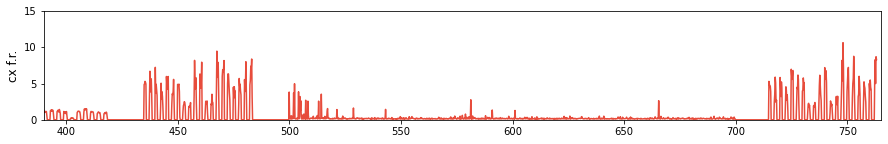

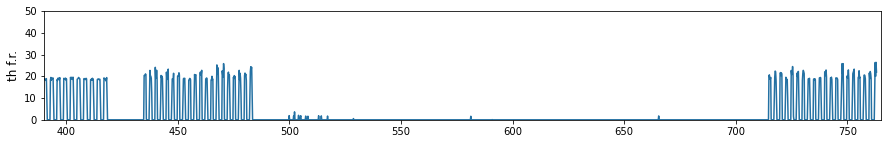

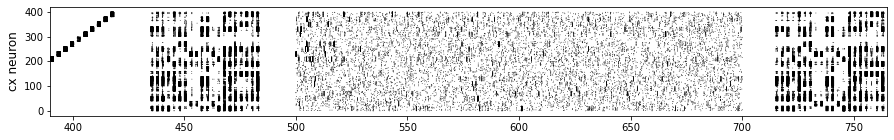

In [277]:

plt.figure(figsize=(15,2))
plt.plot(x_fr2, Fr_cx2, color = [231./255., 76./255., 60./255.])

plt.ylabel('cx f.r.', fontsize = 12.)
#plt.xlim([450, 800])
plt.ylim([0, 15])
plt.xlim([StartTrain_2, 765])

plt.savefig('../Results/ActivityNetwork/' + 'FrCortex_2es.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'FrCortex_2es.png', format = 'png')

plt.figure(figsize=(15,2))
plt.plot(x_fr2, Fr_th2, color = [36./255., 113./255., 163./255.])
plt.ylabel('th f.r.', fontsize = 12.)
#plt.xlim([450, 0])
plt.ylim([0, 50.])
plt.xlim([StartTrain_2, 765])

plt.savefig('../Results/ActivityNetwork/' + 'FrThalamus_2es.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'FrThalamus_2es.png', format = 'png')


plt.figure(figsize=(15,2))
#plt.plot(x, y, 'o', markersize = 0.2, color = 'black', mfc='black', mec='black', mfcalt='black')
plt.scatter(x, y, s=0.6, edgecolors='none', facecolors='black', marker = 'o')

plt.ylabel('cx neuron', fontsize = 12.)
plt.xlim([StartTrain_2, 765])

plt.savefig('../Results/ActivityNetwork/' + 'RasterCortex_2es.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'RasterCortex_2es.png', format = 'png', dpi=300)

(498.0, 503.0)

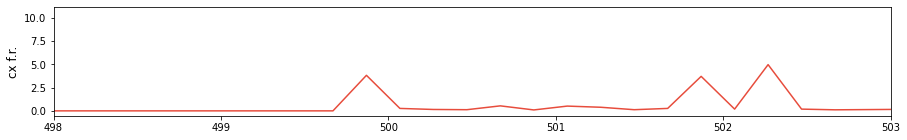

In [286]:

plt.figure(figsize=(15,2))
plt.plot(x_fr2, Fr_cx2, color = [231./255., 76./255., 60./255.])

plt.ylabel('cx f.r.', fontsize = 12.)
plt.xlim([498, 503])

'\n\nplt.figure(figsize=(15,2))\n\nx_plt = np.array(x.copy())\ny_plt = np.array(y.copy())\n\n\ntemp1 = x_plt >= StartSleep_1-0.5\ntemp2 = x_plt < EndSleep_1 + 0.2\nidx_sleep = np.where(temp1 & temp2)[0]\n#plt.figure()\n\nx_plot_temp = x_plt[idx_sleep]\ny_plot_temp = y_plt[idx_sleep]\n\nidx_sort = np.argsort(x_plot_temp)\nx_plot_temp = x_plot_temp[idx_sort]\ny_plot_temp = y_plot_temp[idx_sort]\n\nimport seaborn as sns\nwith sns.color_palette("RdYlGn", n_colors=np.int32(len(idx_sleep)*3.3)):\n    for i in range(len(idx_sleep)-1):\n\n        #plt.plot([x_plt[idx_sleep[i]],x_plt[idx_sleep[i+1]]],[logFr[idx_sleep[i]],logFr[idx_sleep[i+1]]])\n        plt.scatter(x_plot_temp[i], y_plot_temp[i], s=0.6, marker = \'o\')\n\n        \n#train black\nidx_train = np.where(x_plt < StartTest1_Pre-0.1)[0]\nplt.plot(x_plt[idx_train], y_plt[idx_train], color = \'black\')\nplt.scatter(x_plt[idx_train], y_plt[idx_train], s=0.6, edgecolors=\'none\', facecolors=\'black\', marker = \'o\')\n\n#test pre \ntemp1 

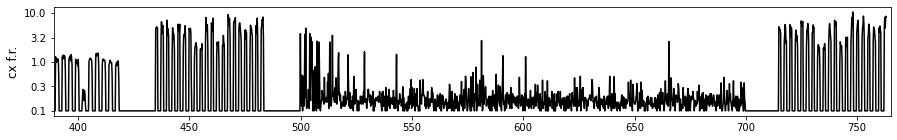

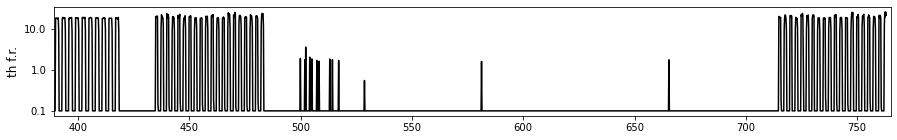

In [255]:
from matplotlib import cm

#import matplotlib.colors

plt.figure(figsize=(15,2))

logFr = Fr_cx2.copy()
logFr[np.where(logFr < 0.1)[0]] = 0.1
logFr = np.log10(logFr)

plt.plot(x_fr2, logFr, color = 'black')


#plt.xlim([100, 125.])
plt.ylabel('cx f.r.', fontsize = 12.)
plt.yticks([-1.0, -0.5, 0., 0.5, 1.0], (np.round(10**(-1.),1), np.round(10**(-.5),1), np.round(10**(0.),1), np.round(10**(0.5),1), np.round(10**(1.),1)))
plt.xlim([StartTrain_2-1, 765])
#plt.ylim([0, 15])
plt.savefig('../Results/ActivityNetwork/' + 'LogFrCortex_2es.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'LogFrCortex_2es.png', format = 'png')



logFrTh = Fr_th.copy()
logFrTh[np.where(logFrTh < 0.1)[0]] = 0.1
logFrTh = np.log10(logFrTh)


plt.figure(figsize=(15,2))

plt.plot(x_fr, logFrTh, color = 'black')
plt.ylabel('th f.r.', fontsize = 12.)
plt.xlim([StartTrain_2-1, 765])
plt.yticks([-1.0, 0., 1.0], (np.round(10**(-1.),1), np.round(10**(0.),1),  np.round(10**(1.),1)))

#plt.ylim([0, 50])
plt.savefig('../Results/ActivityNetwork/' + 'LogFrThalamus_2es.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'LogFrThalamus_2es.png', format = 'png')

'''

plt.figure(figsize=(15,2))

x_plt = np.array(x.copy())
y_plt = np.array(y.copy())


temp1 = x_plt >= StartSleep_1-0.5
temp2 = x_plt < EndSleep_1 + 0.2
idx_sleep = np.where(temp1 & temp2)[0]
#plt.figure()

x_plot_temp = x_plt[idx_sleep]
y_plot_temp = y_plt[idx_sleep]

idx_sort = np.argsort(x_plot_temp)
x_plot_temp = x_plot_temp[idx_sort]
y_plot_temp = y_plot_temp[idx_sort]

import seaborn as sns
with sns.color_palette("RdYlGn", n_colors=np.int32(len(idx_sleep)*3.3)):
    for i in range(len(idx_sleep)-1):

        #plt.plot([x_plt[idx_sleep[i]],x_plt[idx_sleep[i+1]]],[logFr[idx_sleep[i]],logFr[idx_sleep[i+1]]])
        plt.scatter(x_plot_temp[i], y_plot_temp[i], s=0.6, marker = 'o')

        
#train black
idx_train = np.where(x_plt < StartTest1_Pre-0.1)[0]
plt.plot(x_plt[idx_train], y_plt[idx_train], color = 'black')
plt.scatter(x_plt[idx_train], y_plt[idx_train], s=0.6, edgecolors='none', facecolors='black', marker = 'o')

#test pre 
temp1 = x_plt >= StartTest1_Pre-0.5
temp2 = x_plt < EndTest1_Pre + 0.2
idx_test = np.where(temp1 & temp2)[0]
plt.scatter(x_plt[idx_test], y_plt[idx_test], s=0.6, edgecolors='none', facecolors=[31./255., 97./255., 141./255.], marker = 'o')

#test post
temp1 = x_plt >= StartTest1_Post-0.5
temp2 = x_plt < EndTest1_Post + 0.2
idx_test_post = np.where(temp1 & temp2)[0]
plt.scatter(x_plt[idx_test_post], y_plt[idx_test_post], s=0.6, edgecolors='none', facecolors=[20./255., 143./255., 119./255.], marker = 'o')

plt.ylabel('cx neuron', fontsize = 12.)
plt.ylim([0, 400])
plt.xlim([StartTrain_2, 765])
plt.savefig('../Results/ActivityNetwork/' + 'LogRasterCortex_2es.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'LogRasterCortex_2es.png', format = 'png', dpi = 300)
'''

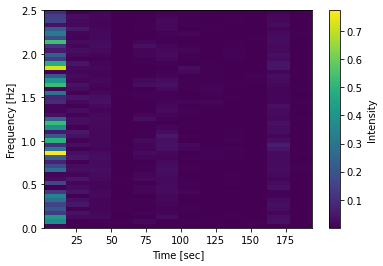

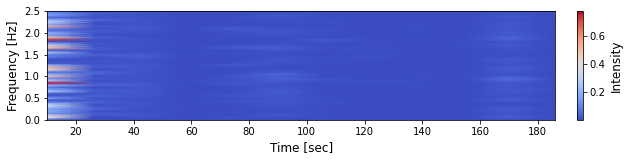

In [55]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

#x_time = np.array(range(0, np.int32(total_time), np.int32(dt)))/1000.
temp1 = x_fr > StartSleep_2
temp2 = x_fr < EndSleep_2
idx = np.where(temp1 & temp2)[0]
Fr = Fr_cx2[idx]

fs = 1./dt

fig = plt.figure()
#f, t, Sxx = signal.spectrogram(np.log(lfp2*(1000./180)), fs)
#plt.pcolormesh(t, fftshift(f), 10*fftshift(Sxx, axes=0))
Pxx, freqs, bins, im = plt.specgram(Fr,  Fs=fs, NFFT=100, detrend='mean', scale='linear', noverlap= 20)
#plt.ylim([0.01, 10])
#plt.yscale('log')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = fig.colorbar(im).set_label('Intensity')

from scipy.interpolate import interp2d

plt.figure(figsize=(10,2))
#plt.imshow(Pxx, aspect=4, interpolation='gaussian')
plt.pcolormesh(bins, freqs, Pxx, cmap='coolwarm', shading='gouraud')
#plt.yscale('log')
#plt.ylim([0.01, 10])
cbar= plt.colorbar(fraction=0.05, pad=0.04)
#plt.clim([0, 3])
plt.ylabel('Frequency [Hz]', fontsize = 12.)
plt.xlabel('Time [sec]', fontsize = 12.)
cbar.set_label('Intensity', fontsize = 12.)
#plt.tight_layout()
plt.savefig('../Results/ActivityNetwork/' + 'Spettrogramma_2es.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'Spettrogramma_2es.png', format = 'png', dpi = 300)


In [84]:
#SO RATIO
# compute fr
# Th-Current, Cx-firing rate computation
start = StartSleep_2
dt = 5
x_fr_SO = np.linspace(StartSleep_2, EndSleep_2, np.int((EndSleep_2-StartSleep_2)/dt))
Fr_cx_SO = np.zeros([20, np.int((EndSleep_2-StartSleep_2)/dt)])



for time in range(0, np.int((EndSleep_2-StartSleep_2)/dt)): # per ogni tempo
    fr_temp = []
    for neur_cx in range(0, N_Cx): # per ogni neurone corticale
        # calcolo il f.r. del neurone corticale
        temp1 = evt_cx_test[neur_cx] >= start + time*dt
        temp2 = evt_cx_test[neur_cx] < start + (time+1)*dt
        idx = np.where(temp1 & temp2)[0]
        fr_temp.append(np.float64(len(evt_cx_test[neur_cx][idx]))/dt)    
    for gr in range(0, 20):
        Fr_cx_SO[gr, time] = np.mean(fr_temp[gr*20:(gr+1)*20])
    
Fr_cx_SO = np.array(Fr_cx_SO)



In [86]:
threshold = 0.5
SO_gr = np.zeros([20, np.int((EndSleep_2-StartSleep_2)/dt)])
for gr in range(0, 20):
    SO_gr[gr] = Fr_cx_SO[gr] > threshold
SO = np.float64(np.sum(SO_gr, axis =0))


<ipython-input-87-ff6894fa31de>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.bar(x_fr_SO + (x_fr_SO[1]-x_fr_SO[0])/2., SO/dt, width = (x_fr_SO[1]-x_fr_SO[0]), EdgeColor = [235./255., 152./255., 78./255.], color = [245./255., 203./255., 167./255.])


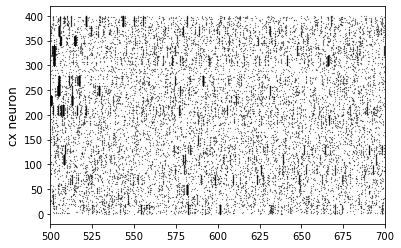

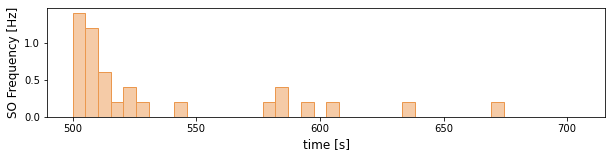

In [87]:
plt.figure()
plt.plot(x, y, 'o', markersize = 0.2, color = 'black', mfc='black', mec='black', mfcalt='black')
plt.ylabel('cx neuron', fontsize = 12.)
plt.xlim([StartSleep_2, EndSleep_2])
plt.figure(figsize=(10,2))
plt.bar(x_fr_SO + (x_fr_SO[1]-x_fr_SO[0])/2., SO/dt, width = (x_fr_SO[1]-x_fr_SO[0]), EdgeColor = [235./255., 152./255., 78./255.], color = [245./255., 203./255., 167./255.])
plt.ylabel('SO Frequency [Hz]', fontsize = 12.)
plt.xlabel('time [s]', fontsize = 12.)
plt.savefig('../Results/ActivityNetwork/' + 'SO_2es.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'SO_2es.png', format = 'png', dpi=300)

<ipython-input-88-c6136dd2c3e6>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.bar(x_fr_SO + (x_fr_SO[1]-x_fr_SO[0])/2., SO/dt, width = (x_fr_SO[1]-x_fr_SO[0]), EdgeColor = [235./255., 152./255., 78./255.], color = [245./255., 203./255., 167./255.])


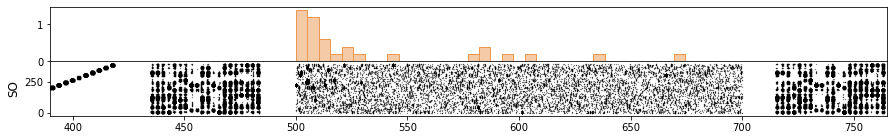

In [88]:
fig = plt.figure(figsize=(15,2))

gs = fig.add_gridspec(2, 1, hspace=0, wspace=0)
(ax2, ax1) = gs.subplots(sharex='col', sharey='row')

ax1.plot(x, y, 'o', markersize = 0.2, color = 'black', mfc='black', mec='black', mfcalt='black')

plt.ylabel('cx neuron', fontsize = 12.)
plt.xlim([StartTrain_2, 765])

ax2.bar(x_fr_SO + (x_fr_SO[1]-x_fr_SO[0])/2., SO/dt, width = (x_fr_SO[1]-x_fr_SO[0]), EdgeColor = [235./255., 152./255., 78./255.], color = [245./255., 203./255., 167./255.])
plt.ylabel('SO', fontsize = 12.)
plt.savefig('../Results/ActivityNetwork/' + 'SO_2es_ver2.eps', format = 'eps')
plt.savefig('../Results/ActivityNetwork/' + 'SO_2es_ver2.png', format = 'png', dpi=300)

In [320]:
## Plot SO per 2 esempi

home = os.getcwd()
#loading_path = home + '/../SimulationOutput/Thaco_SleepActivity/temp10.0/'
loading_path = home + '/../SimulationOutput/Thaco_SleepActivity/sub10/'
#loading_path = home + '/../SimulationOutput/Thaco_SleepActivity2/sub10/'

evt_cx_test = sio.loadmat(loading_path + 'events.mat')['evt_exc'][0]/1000.


N_Cx = 400 #len(evt_cx_test)


x = []
y = []
for neur in range(0, N_Cx):
    try:
        x.extend(evt_cx_test[neur][0])
        y.extend(np.ones([len(evt_cx_test[neur][0])])*neur)
    except IndexError:
        a = 1
        
# compute fr
# Th-Current, Cx-firing rate computation
start = 500.
dt = 0.08
Fr_cx_ops = []
print(np.max(x))
x_fr_ops = np.linspace(start, np.int(np.max(x)), np.int((np.max(x)-start)/dt))

for time in range(0, np.int((np.max(x)-500.)/dt)): # per ogni tempo
    fr_temp = []
    for neur_cx in range(0, N_Cx): # per ogni neurone corticale
        # calcolo il f.r. del neurone corticale
        temp1 = evt_cx_test[neur_cx] >= start + time*dt
        temp2 = evt_cx_test[neur_cx] < start + (time+1)*dt
        idx = np.where(temp1 & temp2)[0]
        fr_temp.append(np.float64(len(evt_cx_test[neur_cx][idx]))/dt)    
    Fr_cx_ops.append(np.mean(fr_temp))

    
Fr_cx_ops = np.array(Fr_cx_ops)


763.4701


Text(0, 0.5, 'F.r. [Hz]')

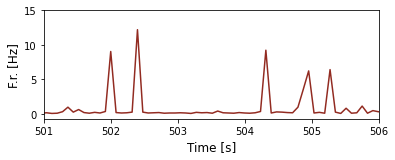

In [321]:
plt.figure(figsize=(6,2))
plt.plot(x_fr_ops, Fr_cx_ops, color = [146./255., 43./255., 33./255.])
plt.xlim([501, 506])
plt.xlabel('Time [s]', fontsize = 12.)
plt.ylabel('F.r. [Hz]', fontsize = 12.)